In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()

In [6]:
X = pd.DataFrame(data['data'], columns=data.feature_names)

In [7]:
Y = pd.Series(data['target'])

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123, stratify=Y)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
# ako se desi da veliki broj iteracija ne dovode do promene early_stopping
model = MLPClassifier(hidden_layer_sizes=(60,20), max_iter=2000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=40)

In [12]:
model.fit(x_train, y_train)

/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/base.p

MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 20), max_iter=2000,
              n_iter_no_change=40)

In [13]:
from sklearn.metrics import accuracy_score 

In [14]:
accuracy_score(y_test, model.predict(x_test))

0.8666666666666667

In [15]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'cross-entropy')

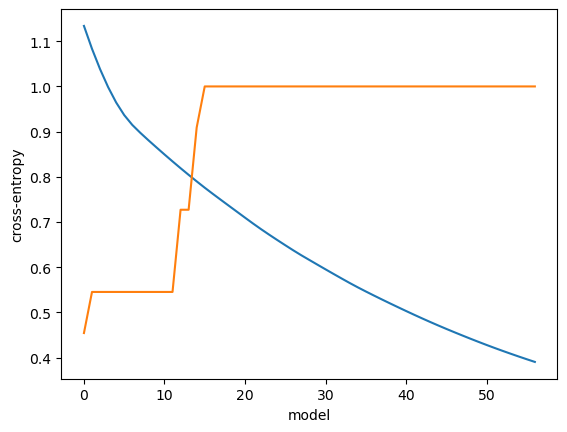

In [16]:
plt.plot(model.loss_curve_)
plt.plot(model.validation_scores_)
plt.xlabel('model')
plt.ylabel('cross-entropy')
# plavo - greska trening skupa
# zuto - greska test skupa
# doslo je do preprilagodjavanja